In [1]:
import os
import os.path as op
import boto3
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
from skimage.filters import try_all_threshold
from diff_classifier import aws
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.transform import resize
import numpy.ma as ma
from skimage import morphology
from scipy.ndimage.morphology import distance_transform_edt as Euclidean

In [2]:
from diff_classifier import PNNs

In [3]:
s3_bucket = 'mckenna.data'
s3_folder = '11_16_18_MPT_in_PNNs'
prefix = 'HBSS_vid_3'
s3_img_filename = '{}_z_stack_MaxIP.tif'.format(prefix)
s3_feat_filename = "features_{}.csv".format(prefix)
aws.download_s3('{}/{}'.format(s3_folder,s3_feat_filename), s3_feat_filename, bucket_name=s3_bucket)
feat_name = s3_feat_filename
feat_df = pd.read_csv(feat_name)
aws.download_s3('{}/{}'.format(s3_folder,s3_img_filename), s3_img_filename, bucket_name = s3_bucket)
img = skimage.io.imread(s3_img_filename)

In [4]:
Deff1_binning, Deff1_plot_data, Deff1_x, Deff1_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'Deff1', box_plot=False)


/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ubuntu/source/diff-classifier/diff_classifier/PNNs.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  raw_df['Euc'][i] = euc_img[int(round(raw_df['X'][i])),int(round(raw_df['Y'][i]))]
/home/ubuntu/source/diff-classifier/diff_classifier/PNNs.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  raw_df['Bin'][i] = 5
/home/ubuntu/source/diff-classifier/diff_classifier/PNNs.py:99: SettingWithCopyWarning: 
A value is tryin

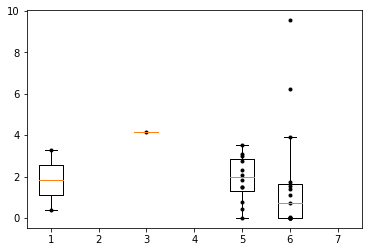

In [5]:
plt.boxplot(Deff1_plot_data, showfliers = False)
plt.plot(Deff1_x,Deff1_y,'k.')
plt.show()

In [6]:
Deff1_binning

,Unnamed: 0,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,frames,X,Y,Quality,Mean_Intensity,SN_Ratio,Deff1,Deff2,Euc,Bin
0,0,0.0,4.066274e-01,1.234418,1.729094,0.934477,0.130155,0.351253,2.015855,0.503933,...,37.0,509.015730,1142.000000,19.158695,200.923109,1.491304,0.408862,NaN,125.992063,5.0
1,1,1.0,7.617790e-02,22.602545,2.844596,0.935092,0.129522,0.352340,3.622573,0.723953,...,121.0,506.762867,1151.349323,19.015180,233.703120,1.981142,1.475014,0.141288,120.917327,5.0
2,2,2.0,1.473815e-08,22.318937,2.738254,0.845722,0.204613,0.245884,1.783135,0.439190,...,651.0,992.308138,1406.011083,21.289274,259.155908,2.653319,1.542021,0.324345,167.370846,6.0
3,3,3.0,1.199997e+00,0.315534,3.486660,0.684978,0.307101,0.151410,1.476176,0.322574,...,552.0,534.741736,1124.659826,28.118277,246.298042,1.584998,3.505944,0.972378,124.823876,5.0
4,4,4.0,6.867712e-01,4.453814,2.048315,0.455501,0.440563,0.078401,1.097825,0.089108,...,95.0,524.004213,1153.821478,19.130313,215.748511,1.905066,1.853615,NaN,107.056060,5.0
5,5,5.0,3.417332e-02,0.008623,2.716543,0.412137,0.466950,0.068300,1.372950,0.271641,...,651.0,1527.849205,1289.100075,62.646489,333.839246,0.801680,0.000802,0.000095,362.295460,6.0
6,6,6.0,1.036454e+00,1.144086,1.817863,0.899142,0.163010,0.299709,1.504469,0.335314,...,44.0,1273.056117,1260.794551,15.521922,184.073643,1.497412,1.090887,NaN,321.014018,6.0
7,7,7.0,1.737973e-01,0.173863,3.209750,0.865935,0.189659,0.263946,2.116179,0.527450,...,651.0,1531.519726,1266.492676,18.100289,275.027304,2.622062,0.028056,0.003549,350.697876,6.0
8,8,8.0,1.235342e-07,23.080683,2.520168,0.780448,0.248782,0.199595,1.946014,0.486129,...,496.0,1274.293518,1264.200154,24.891050,217.978307,1.351537,1.749976,0.237328,318.025156,6.0
9,9,9.0,2.125024e-01,7.290224,1.958600,0.057650,0.782795,0.007449,1.015960,0.015709,...,51.0,1280.257552,1263.243048,28.388398,226.960936,1.236547,1.385392,NaN,319.156701,6.0


In [7]:
feat_df = pd.read_csv(feat_name)

In [8]:
alpha_binning, alpha_plot_data, alpha_x, alpha_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'alpha', box_plot=False)


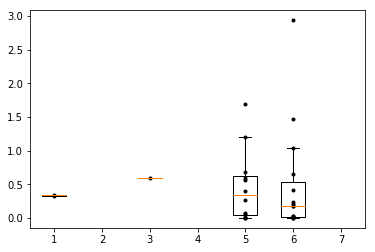

In [9]:
plt.boxplot(alpha_plot_data, showfliers = False)
plt.plot(alpha_x,alpha_y,'k.')
plt.show()

In [10]:
feat_df = pd.read_csv(feat_name)

In [11]:
D_fit_binning, D_fit_plot_data, D_fit_x, D_fit_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'D_fit', box_plot=False)


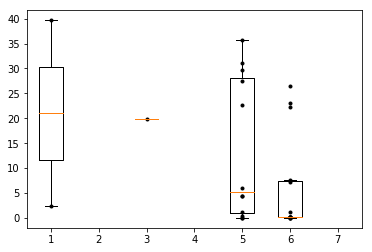

In [12]:
plt.boxplot(D_fit_plot_data, showfliers = False)
plt.plot(D_fit_x,D_fit_y,'k.')
plt.show()

In [13]:
feat_df = pd.read_csv(feat_name)

In [14]:
kurt_binning, kurt_plot_data, kurt_x, kurt_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'kurtosis', box_plot=False)


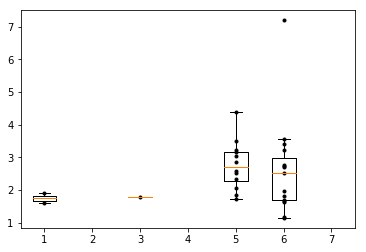

In [15]:
plt.boxplot(kurt_plot_data, showfliers = False)
plt.plot(kurt_x,kurt_y,'k.')
plt.show()

In [16]:
feat_df = pd.read_csv(feat_name)

In [17]:
asym1_binning, asym1_plot_data, asym1_x, asym1_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'asymmetry1', box_plot=False)


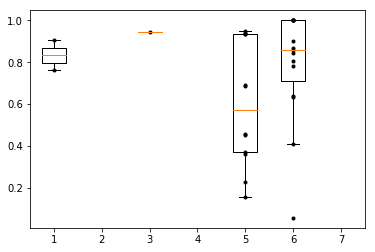

In [18]:
plt.boxplot(asym1_plot_data, showfliers = False)
plt.plot(asym1_x,asym1_y,'k.')
plt.show()

In [19]:
feat_df = pd.read_csv(feat_name)

In [20]:
asym2_binning, asym2_plot_data, asym2_x, asym2_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'asymmetry2', box_plot=False)


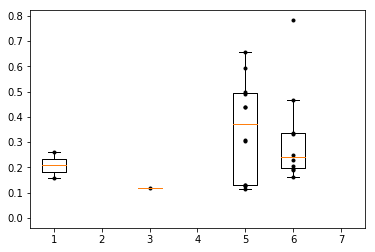

In [21]:
plt.boxplot(asym2_plot_data, showfliers = False)
plt.plot(asym2_x,asym2_y,'k.')
plt.show()

In [22]:
feat_df = pd.read_csv(feat_name)

In [23]:
asym3_binning, asym3_plot_data, asym3_x, asym3_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'asymmetry3', box_plot=False)


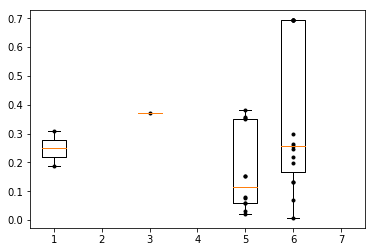

In [24]:
plt.boxplot(asym3_plot_data, showfliers = False)
plt.plot(asym3_x,asym3_y,'k.')
plt.show()

In [25]:
feat_df = pd.read_csv(feat_name)

In [26]:
AR_binning, AR_plot_data, AR_x, AR_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'AR', box_plot=False)


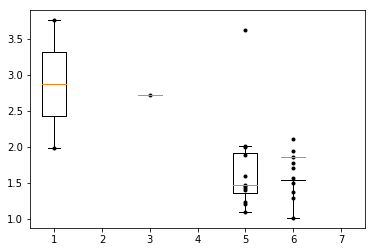

In [27]:
plt.boxplot(AR_plot_data, showfliers = False)
plt.plot(AR_x,AR_y,'k.')
plt.show()

In [28]:
feat_df = pd.read_csv(feat_name)

In [29]:
elong_binning, elong_plot_data, elong_x, elong_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'elongation', box_plot=False)


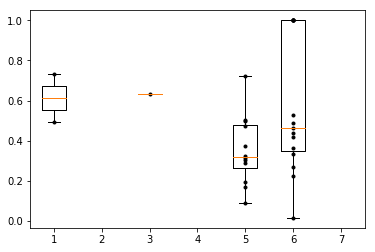

In [30]:
plt.boxplot(elong_plot_data, showfliers = False)
plt.plot(elong_x,elong_y,'k.')
plt.show()

In [31]:
feat_df = pd.read_csv(feat_name)

In [32]:
bound_binning, bound_plot_data, bound_x, bound_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'boundedness', box_plot=False)


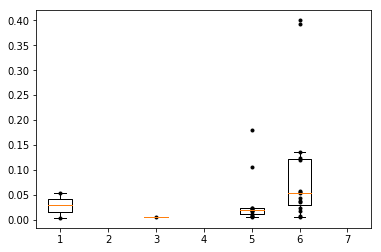

In [33]:
plt.boxplot(bound_plot_data, showfliers = False)
plt.plot(bound_x,bound_y,'k.')
plt.show()

In [34]:
feat_df = pd.read_csv(feat_name)

In [35]:
trap_binning, trap_plot_data, trap_x, trap_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'trappedness', box_plot=False)


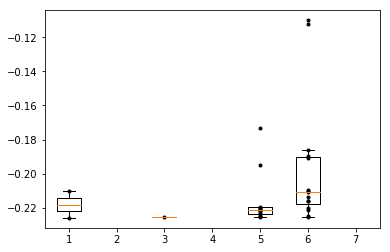

In [36]:
plt.boxplot(trap_plot_data, showfliers = False)
plt.plot(trap_x,trap_y,'k.')
plt.show()

In [37]:
feat_df = pd.read_csv(feat_name)

In [38]:
effic_binning, effic_plot_data, effic_x, effic_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'efficiency', box_plot=False)


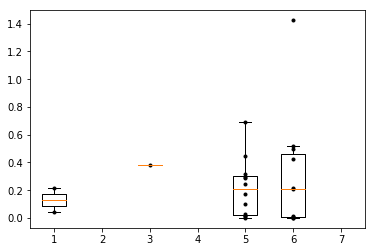

In [39]:
plt.boxplot(effic_plot_data, showfliers = False)
plt.plot(effic_x,effic_y,'k.')
plt.show()

In [40]:
feat_df = pd.read_csv(feat_name)

In [41]:
straight_binning, straight_plot_data, straight_x, straight_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'straightness', box_plot=False)


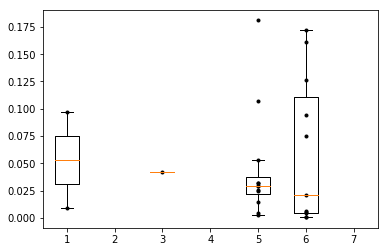

In [42]:
plt.boxplot(straight_plot_data, showfliers = False)
plt.plot(straight_x,straight_y,'k.')
plt.show()

In [43]:
feat_df = pd.read_csv(feat_name)

In [44]:
frame_binning, frame_plot_data, frame_x, frame_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'frames', box_plot=False)


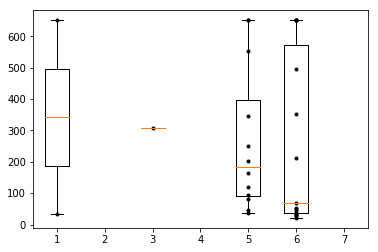

In [45]:
plt.boxplot(frame_plot_data, showfliers = False)
plt.plot(frame_x,frame_y,'k.')
plt.show()

In [46]:
feat_df = pd.read_csv(feat_name)

In [47]:
euc_binning, euc_plot_data, euc_x, euc_y = PNNs.PNN_binning(img, feat_df, min_obj_size=3000, feat = 'Euc', box_plot=False)


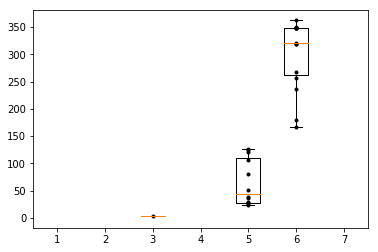

In [48]:
plt.boxplot(euc_plot_data, showfliers = False)
plt.plot(euc_x,euc_y,'k.')
plt.show()

In [49]:
feat_df = pd.read_csv(feat_name)